In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib
from astropy.table import Table
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

import astroplan
from astroplan import plots as aplt

Using matplotlib backend: Qt5Agg


In [14]:
plt.style.use('az-paper-twocol')

In [21]:
from astroplan import download_IERS_A
download_IERS_A()

In [29]:
data = [
['SN2018aoq', '12:10:38.19',    '+39:23:47.0',    0.003319    ,'SN II'    ,177    ,9    ,'2018-07-16',    'Yes'    ],
['SN2018aad', '03:58:01.54',    '-65:30:24.3',    0.025        ,'SN II'    ,362    ,11    ,'2018-11-19',    'Yes'    ],
['SN2018zd',  '06:18:03.18',    '+78:22:00.9',    0.002979    ,'SN II'    ,291    ,9    ,'2018-11-06',    'Yes'    ],
['SN2018pq',  '12:55:31.29',    '-50:03:17.0',    0.007        ,'SN II'    ,411    ,5    ,'2018-08-14',    'No'    ],
['SN2018is',  '13:16:57.35',    '-16:37:04.4',    0.005811    ,'SN II'    ,409    ,12    ,'2018-07-29',    'No'    ],
['SN2018gk',  '16:35:53.90',    '+40:01:57.8',    0.031        ,'SN II'    ,174    ,5    ,'2018-07-02',    'No'    ],
['SN2018gj',  '16:32:02.40',    '+78:12:41.1',    0.004556    ,'SN II'    ,380    ,16    ,'2018-10-07',    'No'    ],
['SN2017jbj', '00:48:05.42',    '-02:47:22.4',    0.013492    ,'SN II'    ,97    ,1    ,'2018-02-10',    'No'    ],
['SN2017ivv', '20:28:49.84',    '-04:22:57.3',    0.022        ,'SN II'    ,228    ,0    ,'2018-11-16',    'Yes'    ],
['SN2017ivh', '13:39:36.25',    '-11:28:55.9',    0.007717    ,'SN II'    ,419    ,3    ,'2018-08-13',    'No'    ],
['SN2017ipa', '06:37:58.15',    '-15:22:00.6',    0.025        ,'SN II'    ,243    ,0    ,'2018-05-03',    'No'    ],
['SN2017iit', '05:03:20.16',    '+18:27:03.1',    0.017        ,'SN II'    ,239    ,10    ,'2018-11-04',    'No'    ],
['SN2017hxv', '21:44:23.01',    '-29:54:59.6',    0.016        ,'SN IIP'    ,225    ,0    ,'2018-11-24',    'Yes'    ],
['SN2017hpi', '08:15:43.47',    '-28:51:19.8',    0.0057        ,'SN II'    ,403    ,0    ,'2018-11-19',    'Yes'    ],
['SN2017gkp', '08:47:11.79',    '-33:45:10.9',    0.007        ,'SN II'    ,181    ,1    ,'2018-11-26',    'Yes'    ],
['SN2017hbj', '04:31:07.68',    '-63:19:11.1',    0.017        ,'SN II'    ,375    ,1    ,'2018-04-02',    'No'    ],
['SN2017gmr', '02:35:30.15',    '-09:21:15.0',    0.005        ,'SN IIP'    ,821    ,26    ,'2018-11-15',    'Yes'    ],
['SN2018yu' , '05:22:32.36',    '-11:29:13.8',    0.008112     , 'SN Ia',   448,    6,     '2018-11-24',   'Yes'],
['SN2018oh',  '09:06:39.59',    '+19:20:17.5',    0.010981     , 'SN Ia',   383,    11,    '2018-11-04',   'Yes'],
['SN2017eaw', '20:34:44.24',    '+60:11:35.9',    0.000133    , 'SN II',   494,    31,   '2018-11-09',    'Yes'],
['SN2018ivc', '02:42:41.29',    '-00:00:31.8',    0.003793,     'SN II',   202,    5,     '2018-12-02',    'Yes'],
['SN2018atq', '11:47:04.12',    '+19:33:02.8',    0.17,         'SLSN-II?',153,    7,     '2018-07-11',    'Yes']
]

In [30]:
tbdata = Table(names=['name', 'ra', 'dec', 'z', 'type', 'nphot', 'nspec', 'last_obs', 'active'], 
               dtype=('S', 'S', 'S', 'f', 'S', 'f', 'f', 'S', 'S'))
for irow in data:
    tbdata.add_row(irow)

In [7]:
keck = astroplan.Observer.at_site('keck')
obs_day = Time('2018-12-04')
#start = keck.twilight_evening_civil(obs_day)
start = Time('2018-12-04 10:11:00')
end = keck.twilight_morning_civil(obs_day+(1*u.day))
end_astro = keck.twilight_morning_astronomical(obs_day+(1*u.day))
night = Time(np.linspace(start.jd, end.jd, 1000), format='jd')
print(start, end)

2018-12-04 10:11:00.000 2458457.179524975


In [8]:
current_cycler = plt.rcParams['axes.prop_cycle']
new_ls = plt.cycler(linestyle=['-', '--'])
new_cycler = current_cycler*new_ls
plt.rcParams['axes.prop_cycle'] = new_cycler

SN2018aoq -3182.2979151473055
SN2018aad -4024.765771159146
SN2018zd 1.9153286818487667
SN2018pq -1212.9149536195532
SN2018is -1017.6163463337738
SN2018gk -1530.7475962240262
SN2018gj 2.8719055673059546
SN2017jbj -1214.6987945979672
SN2017ivv -1.864187486884697
SN2017ivh -1165.1988971099927
SN2017ipa 1.2239608319933348
SN2017iit 1.0002791210066315
SN2017hxv -2.7224644813844265
SN2017hpi 1.516358335294012
SN2017gkp 1.6870778324470206
SN2017hbj -4071.881703010117
SN2017gmr -1249.476329663344
SN2018yu 1.1703235502985343
SN2018oh 1.000049082150212
SN2017eaw -217283.70070421966
SN2018ivc -10230.85780664462
SN2018atq -3050.7333174417668


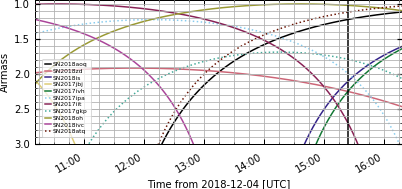

In [31]:
excellent_targets = ['SN2017jbj', 'SN2017iit', 'SN2018zd', 'SN2018oh', 
                     'SN2018ivc', 'SN2018aoq', 'SN2018is', 'SN2017ivh']
good_targets = ['SN2017jbj', 'SN2017iit', 'SN2018zd', 'SN2017ipa', 'SN2017gkp', 
                     'SN2018ivc', 'SN2018aoq', 'SN2018is', 'SN2017ivh', 'SN2018atq']
fig = plt.figure()
fig.subplotpars.update(left=0.1, bottom=0.25)
ax = fig.add_subplot(1,1,1)

for irow in tbdata:
    coords = SkyCoord(irow['ra'], irow['dec'], unit=(u.hourangle, u.degree))
    sn = astroplan.FixedTarget(name=irow['name'], coord=coords)
    if sn.name in excellent_targets:
        ax = aplt.plot_airmass(sn, keck, Time(night, format='jd'), style_kwargs={'linestyle':'-'})
    elif sn.name in good_targets:
        ax = aplt.plot_airmass(sn, keck, Time(night, format='jd'), style_kwargs={'linestyle':':'})
    print(irow['name'], np.min(keck.altaz(night, sn).secz))
ax.axvline(mpl.dates.date2num(end_astro.datetime))
mpl_xticks = ax.get_xticks()
astro_xticks = Time(mpl.dates.num2date(mpl_xticks))
ax.set_ylim(ymax=0.95)
ax.grid(which='both')
plt.legend()
plt.savefig('targets.pdf')

SN2018aoq -3182.2979151473055
SN2018aad -4024.765771159146
SN2018zd 1.9153286818487667
SN2018pq -1212.9149536195532
SN2018is -1017.6163463337738
SN2018gk -1530.7475962240262
SN2018gj 2.8719055673059546
SN2017jbj -1214.6987945979672
SN2017ivv -1.864187486884697
SN2017ivh -1165.1988971099927
SN2017ipa 1.2239608319933348
SN2017iit 1.0002791210066315
SN2017hxv -2.7224644813844265
SN2017hpi 1.516358335294012
SN2017gkp 1.6870778324470206
SN2017hbj -4071.881703010117
SN2017gmr -1249.476329663344
SN2018yu 1.1703235502985343
SN2018oh 1.000049082150212
SN2017eaw -217283.70070421966
SN2018ivc -10230.85780664462
SN2018atq -3050.7333174417668


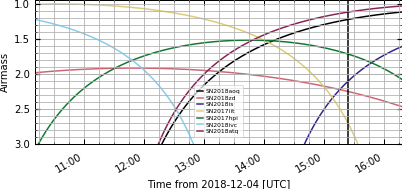

In [40]:
poor_targets = ['SN2017iit', 'SN2018zd', 'SN2018ivc', 'SN2018atq', 'SN2017hpi', 'SN2018aoq', 'SN2018is']
fig = plt.figure()
fig.subplotpars.update(left=0.1, bottom=0.25)
ax = fig.add_subplot(1,1,1)

for irow in tbdata:
    coords = SkyCoord(irow['ra'], irow['dec'], unit=(u.hourangle, u.degree))
    sn = astroplan.FixedTarget(name=irow['name'], coord=coords)
    if sn.name in poor_targets:
        ax = aplt.plot_airmass(sn, keck, Time(night, format='jd'), style_kwargs={'linestyle':None})
    print(irow['name'], np.min(keck.altaz(night, sn).secz))
ax.axvline(mpl.dates.date2num(end_astro.datetime))
mpl_xticks = ax.get_xticks()
astro_xticks = Time(mpl.dates.num2date(mpl_xticks))
ax.set_ylim(ymax=0.95)
ax.grid(which='both')
plt.legend()
plt.savefig('poor_targets.pdf')

In [20]:
print(end_astro.iso)

2018-12-04 15:24:18.324


# Look at Standards:

In [44]:
data_std = [['BD284211 (blue)','21 51 11.02', '+28 51 50.4'], 
['BD174708 (red)', '22 11 31.37', '+18 05 34.2'], 
['HD19445 (red)',  '03 08 25.86', '+26 20 05.7'], 
['G191B2B (blue)', '05 05 30.60', '+52 49 54.0'], 
['HD84937 (red)',  '09 48 56.09', '+13 44 39.3'], 
['Feige34 (blue)', '10 39 36.74', '+43 06 09.3'], 
['HZ44 (blue)',    '13 23 35.26', '+36 07 59.5'], 
['BD262606 (red)', '14 49 02.35', '+25 42 09.1'], 
['BD+33d2642',     '15 51 59.86', '+32 56 54.8'], 
['Feige 110',      '23 19 58.39', '-05 09 55.8']]

tbdata_std = Table(names=['name', 'ra', 'dec'], dtype=('S', 'S', 'S'))
for irow in data_std:
    tbdata_std.add_row(irow)

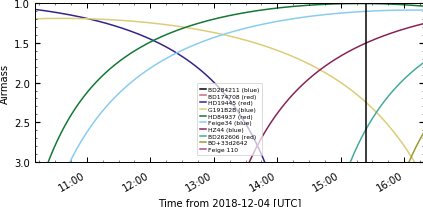

In [46]:
plt.figure()
for irow in tbdata_std:
    coords = SkyCoord(irow['ra'], irow['dec'], unit=(u.hourangle, u.degree))
    sn = astroplan.FixedTarget(name=irow['name'], coord=coords)
    ax = aplt.plot_airmass(sn, keck, Time(night, format='jd'), style_kwargs={'linestyle':None})
ax.axvline(mpl.dates.date2num(end_astro.datetime))
mpl_xticks = ax.get_xticks()
astro_xticks = Time(mpl.dates.num2date(mpl_xticks))
plt.legend(loc='lower center')
plt.savefig('standards.pdf')